In [1]:
import pandas as pd

# Raw link of the CSV file
url = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day24-standardization/Social_Network_Ads.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(url)


In [2]:
df.sample(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
148,15779862,Male,29,61000,0
96,15710257,Female,35,25000,0
202,15735549,Female,39,134000,1


In [3]:
df = df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
df.sample(2)

,Age,EstimatedSalary,Purchased
197,20,36000,0
360,43,129000,1


In [5]:
X = df.iloc[:,0:2]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [6]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

Train test split

In [7]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.3)

In [8]:
X_train.shape , X_test.shape

((280, 2), (120, 2))

Standard Scale

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler.fit(X_train) # Fit scaler to trin set , it will learn the parameters

StandardScaler()

In [ ]:
scaler.mean_ #3.71178571e+01:Age, 7.14392857e+04: Salary

array([3.71178571e+01, 7.14392857e+04])

hamesha hum training se sikhte hai or transform karte hai train or test donon ko

In [12]:
# transformed train and test sets
X_train_Scaled=scaler.transform(X_train)
X_test_Scaled=scaler.transform(X_test)

In [ ]:
X_train_Scaled # yahi problem hai , it takes df(X_train) and give np.array

array([[ 0.08556733, -0.01282575],
       [-0.49642906,  0.83388253],
       [-0.39942967, -0.8303372 ],
       [-1.17542485, -1.44347078],
       [ 0.95856191, -0.65515617],
       [ 0.18256673,  1.47621295],
       [-0.69042786,  0.24994578],
       [ 0.08556733, -0.62595934],
       [-0.20543087, -0.30479413],
       [-0.88442666, -0.80114036],
       [ 0.27956612, -0.42158148],
       [ 0.18256673, -0.85953403],
       [-0.20543087,  0.57111099],
       [-0.20543087,  0.48352048],
       [-0.20543087,  0.22074894],
       [ 2.0255553 ,  2.11854337],
       [-0.30243027, -0.8303372 ],
       [-0.49642906,  1.33022876],
       [-0.10843147, -1.12230557],
       [ 0.95856191, -1.35588027],
       [-0.98142606, -0.42158148],
       [-0.98142606, -1.58945497],
       [-0.10843147, -0.24640045],
       [ 1.15256071,  0.51271732],
       [ 1.15256071, -0.94712455],
       [ 1.34655951, -1.41427394],
       [-0.88442666, -1.00551822],
       [-0.01143207,  0.22074894],
       [ 0.76456312,

In [17]:
X_train_Scaled=pd.DataFrame(X_train_Scaled,columns=X_train.columns)
X_test_Scaled=pd.DataFrame(X_test_Scaled,columns=X_test.columns)

In [19]:
X_train_Scaled.sample(3)

,Age,EstimatedSalary
122,-0.981426,0.366733
104,0.764563,-1.151502
0,0.085567,-0.012826


In [22]:
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.117857,71439.285714
std,10.327801,34311.610617
min,18.000000,15000.000000
25%,29.000000,45000.000000
50%,37.000000,71000.000000
75%,44.250000,88250.000000
max,60.000000,150000.000000


In [23]:
X_train_Scaled.describe()

,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02
mean,2.505932e-16,1.134014e-16
std,1.001791e+00,1.001791e+00
min,-1.854421e+00,-1.647849e+00
25%,-7.874273e-01,-7.719435e-01
50%,-1.143207e-02,-1.282575e-02
75%,6.918136e-01,4.908197e-01
max,2.219554e+00,2.293724e+00


In [ ]:
np.round(X_train_Scaled.describe(),1)
# mean = 0 , std = 1

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.7,0.5
max,2.2,2.3


Effecting of scaling

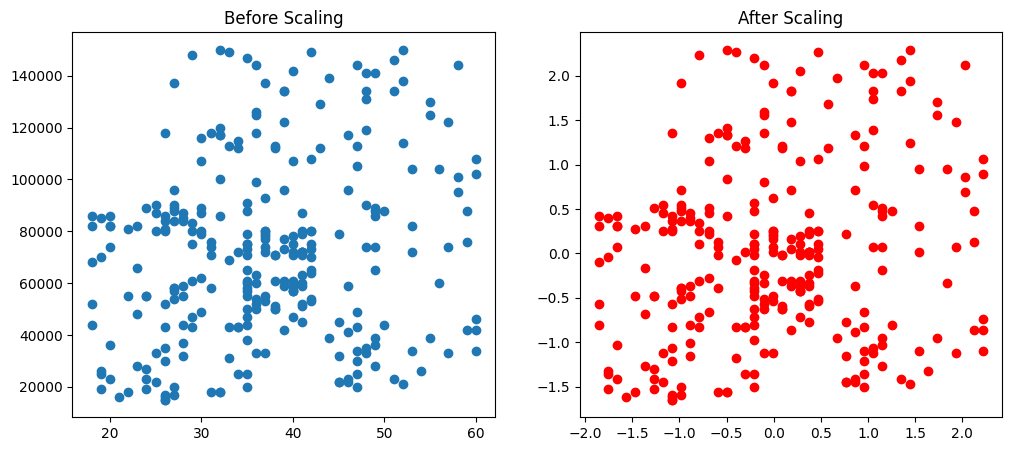

In [29]:
from matplotlib import pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_Scaled['Age'], X_train_Scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

bas mean centerd ho gaya or x,y-axix normalized ho gaya

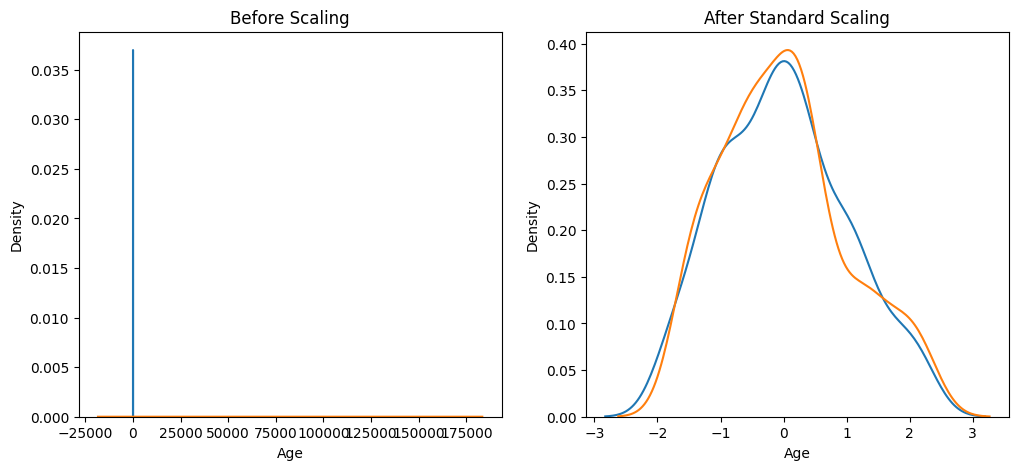

In [32]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_Scaled['Age'], ax=ax2)
sns.kdeplot(X_train_Scaled['EstimatedSalary'], ax=ax2)
plt.show()

Comparision Of destributiom

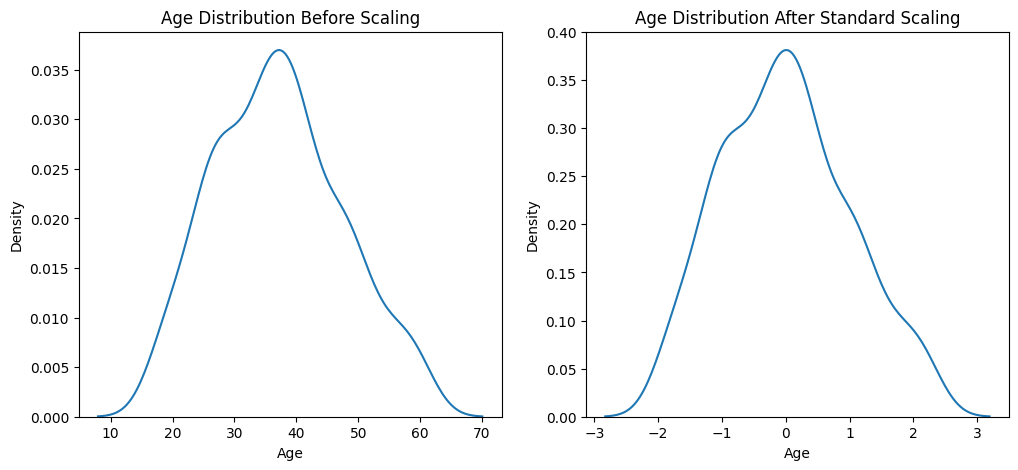

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_Scaled['Age'], ax=ax2)
plt.show()

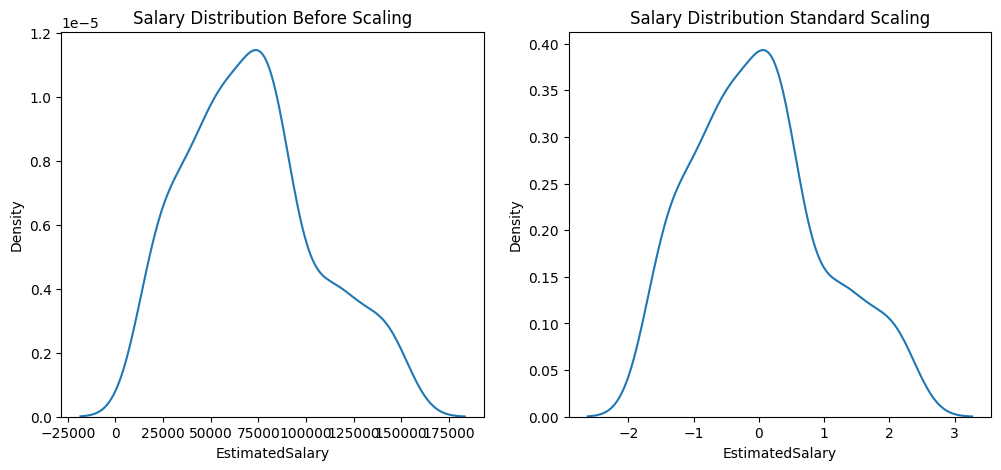

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_Scaled['EstimatedSalary'], ax=ax2)
plt.show()

Why Scaling is important

In [37]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log_scaled = LogisticRegression()

In [39]:
log.fit(X_train,y_train)
log_scaled.fit(X_train_Scaled,y_train)

LogisticRegression()

In [40]:
ypred = log.predict(X_test)
ypred_scale = log_scaled.predict(X_test_Scaled)

In [ ]:
from sklearn.metrics import accuracy_score
print("Actual" , accuracy_score(y_test,ypred))
print("Scaled" , accuracy_score(y_test,ypred_scale))
 # kuch hua nahi lekin Actual me kam aana chaiya or scaled me jyada

Actual 0.8333333333333334
Scaled 0.8333333333333334
